# Building Grade Exploration

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import plotly.express as px
from scipy.stats import percentileofscore

In [83]:
pd.set_option('display.float_format', '{:.4f}'.format)

In [3]:
df = pd.read_csv("building-benchmarks.csv")

In [4]:
latest_year = df["DataYear"].max()

In [5]:
df_current = df.loc[df["DataYear"] == latest_year]
df_current.head()

DataYear      ID                        PropertyName ReportingStatus  \
0      2022  100001  Presence SMEMC St Elizabeth Campus  Submitted Data   
2      2022  100019                      Dixon Building  Submitted Data   
3      2022  100068                       Joffco Square  Submitted Data   
6      2022  100211                                 NaN  Submitted Data   
7      2022  100252                                 NaN  Submitted Data   

                 Address ZIPCode  ChicagoEnergyRating  \
0   1431 N Claremont Ave   60622                  NaN   
2   411 - 415 S Wells St   60607                  3.5   
3     555 W Roosevelt Rd   60607                  2.0   
6           73 E LAKE ST   60601                  1.5   
7  10426  S MICHIGAN AVE   60628                  4.0   

  ExemptFromChicagoEnergyRating   CommunityArea  PrimaryPropertyType  ...  \
0                          True       WEST TOWN   Mixed Use Property  ...   
2                         False            LOOP               Office  ...   
3                         False  NEAR WEST SIDE         Other - Mall  ...   
6                         False            LOOP  Multifamily Housing  ...   
7                         False        ROSELAND  Multifamily Housing  ...   

   SourceEUIPercentileRank  SiteEUIRank  SiteEUIPercentileRank  \
0                    0.931        158.0                  0.938   
2                    0.422       1519.0                  0.404   
3                    0.944        484.0                  0.811   
6                    0.754        859.5                  0.663   
7                    0.182       2448.5                  0.040   

   GHGIntensityRankByPropertyType  TotalGHGEmissionsRankByPropertyType  \
0                             5.0                                 14.0   
2                           224.5                                303.0   
3                             1.0                                  2.0   
6                           165.5                                194.0   
7                          1095.0                               1364.0   

   ElectricityUseRankByPropertyType  NaturalGasUseRankByPropertyType  \
0                              15.0                              9.0   
2                             306.0                            169.0   
3                               2.0                              3.0   
6                             142.0                            299.0   
7                            1017.0                           1375.0   

   GrossFloorAreaRankByPropertyType  SourceEUIRankByPropertyType  \
0                              17.0                          5.0   
2                             315.0                        231.0   
3                               2.0                          1.0   
6                             218.0                        158.5   
7                            1400.0                       1061.0   

   SiteEUIRankByPropertyType  
0                        5.0  
2                      145.0  
3                        2.0  
6                      379.5  
7                     1348.5  

[5 rows x 56 columns]

In [6]:
print(f"There are {df_current.shape[0]} records for {latest_year}.")

There are 2549 records for 2022.


In [7]:
df.columns

Index(['DataYear', 'ID', 'PropertyName', 'ReportingStatus', 'Address',
       'ZIPCode', 'ChicagoEnergyRating', 'ExemptFromChicagoEnergyRating',
       'CommunityArea', 'PrimaryPropertyType', 'GrossFloorArea', 'YearBuilt',
       'NumberOfBuildings', 'WaterUse', 'ENERGYSTARScore', 'ElectricityUse',
       'NaturalGasUse', 'DistrictSteamUse', 'DistrictChilledWaterUse',
       'AllOtherFuelUse', 'SiteEUI', 'SourceEUI', 'WeatherNormalizedSiteEUI',
       'WeatherNormalizedSourceEUI', 'TotalGHGEmissions', 'GHGIntensity',
       'Latitude', 'Longitude', 'Location', 'Row_ID', 'Wards',
       'CommunityAreas', 'ZipCodes', 'CensusTracts',
       'HistoricalWards2003-2015', 'GHGIntensityRank',
       'GHGIntensityPercentileRank', 'TotalGHGEmissionsRank',
       'TotalGHGEmissionsPercentileRank', 'ElectricityUseRank',
       'ElectricityUsePercentileRank', 'NaturalGasUseRank',
       'NaturalGasUsePercentileRank', 'GrossFloorAreaRank',
       'GrossFloorAreaPercentileRank', 'SourceEUIRank',
    

## EDA Brainstorm

### Number of Records by Property Type

In [8]:
df_current["PrimaryPropertyType"].unique()

array(['Mixed Use Property', 'Office', 'Other - Mall',
       'Multifamily Housing', 'K-12 School',
       'Hospital (General Medical & Surgical)', 'Retail Store', 'Hotel',
       'Strip Mall', 'Senior Living Community', 'College/University',
       'Convention Center', 'Financial Office', 'Enclosed Mall',
       'Other - Entertainment/Public Assembly',
       'Fitness Center/Health Club/Gym', 'Medical Office', 'Other',
       'Library', 'Museum', 'Laboratory', 'Prison/Incarceration',
       'Other - Specialty Hospital', 'Supermarket/Grocery Store',
       'Wholesale Club/Supercenter', 'Residential Care Facility',
       'Movie Theater', 'Data Center', 'Other - Services',
       'Vehicle Dealership', 'Other - Recreation', 'Distribution Center',
       'Residence Hall/Dormitory', 'Performing Arts',
       'Other - Public Services', 'Worship Facility',
       'Pre-school/Daycare', 'Other - Lodging/Residential',
       'Urgent Care/Clinic/Other Outpatient', 'Other - Education',
       'Ou

In [9]:
count_by_prop_type = df_current[["ID", "PrimaryPropertyType"]].groupby("PrimaryPropertyType").count().reset_index()
count_by_prop_type

PrimaryPropertyType    ID
0                              Adult Education     2
1                           College/University    67
2                            Convention Center     2
3                                   Courthouse     1
4                                  Data Center     4
5                          Distribution Center     1
6                                Enclosed Mall     5
7                             Financial Office     3
8               Fitness Center/Health Club/Gym    10
9        Hospital (General Medical & Surgical)    18
10                                       Hotel    72
11                            Ice/Curling Rink     1
12                                 K-12 School   315
13                                  Laboratory    15
14                                     Library     6
15                            Lifestyle Center     1
16                              Medical Office    13
17                          Mixed Use Property    32
18                               Movie Theater     4
19                         Multifamily Housing  1409
20                                      Museum     5
21                                      Office   327
22                                       Other    12
23                           Other - Education     1
24       Other - Entertainment/Public Assembly     3
25                 Other - Lodging/Residential     3
26                                Other - Mall     3
27                     Other - Public Services     3
28                          Other - Recreation     2
29                            Other - Services     1
30                  Other - Specialty Hospital     3
31  Outpatient Rehabilitation/Physical Therapy     4
32                             Performing Arts     7
33                          Pre-school/Daycare     2
34                        Prison/Incarceration     1
35                    Residence Hall/Dormitory     9
36                   Residential Care Facility    10
37                                Retail Store    37
38                     Senior Living Community    63
39                         Social/Meeting Hall     2
40                                  Strip Mall    19
41                   Supermarket/Grocery Store    36
42         Urgent Care/Clinic/Other Outpatient     1
43                          Vehicle Dealership     2
44                  Wholesale Club/Supercenter     5
45                            Worship Facility     7

In [10]:
count_by_prop_type.ID.min()

1

In [11]:
count_by_prop_type.ID.max()

1409

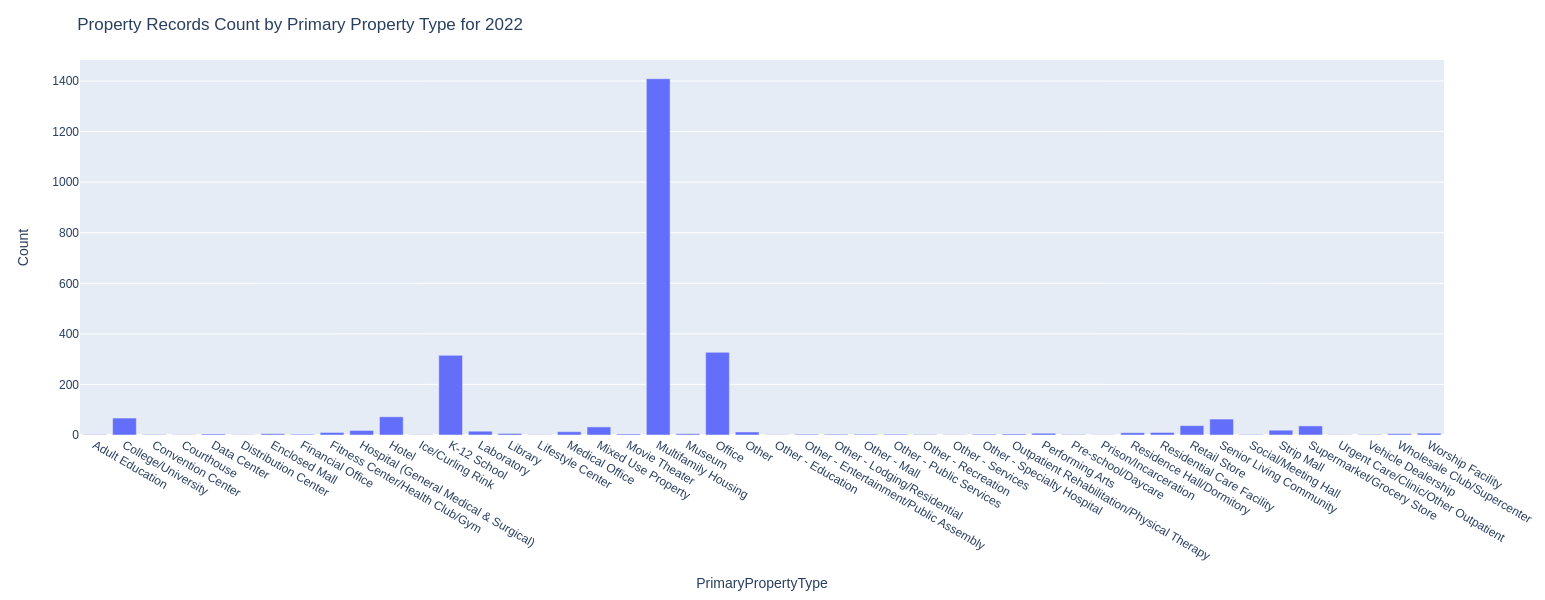

In [12]:
fig = px.bar(count_by_prop_type, x='PrimaryPropertyType', y='ID')

fig.update_layout(
    width=1200,
    height=600,
    title=f"Property Records Count by Primary Property Type for {latest_year}",
    yaxis_title='Count',
)

fig.show()

Conclusion: some categories are too sparse, so doing grading based on where a building stands compared to "peers" (same category) may be unreasonable. Unless we find data with corresponding categories but with more data points (e.g. national data).

## GHG Intensity Missingness and Distribution (Latest Year)

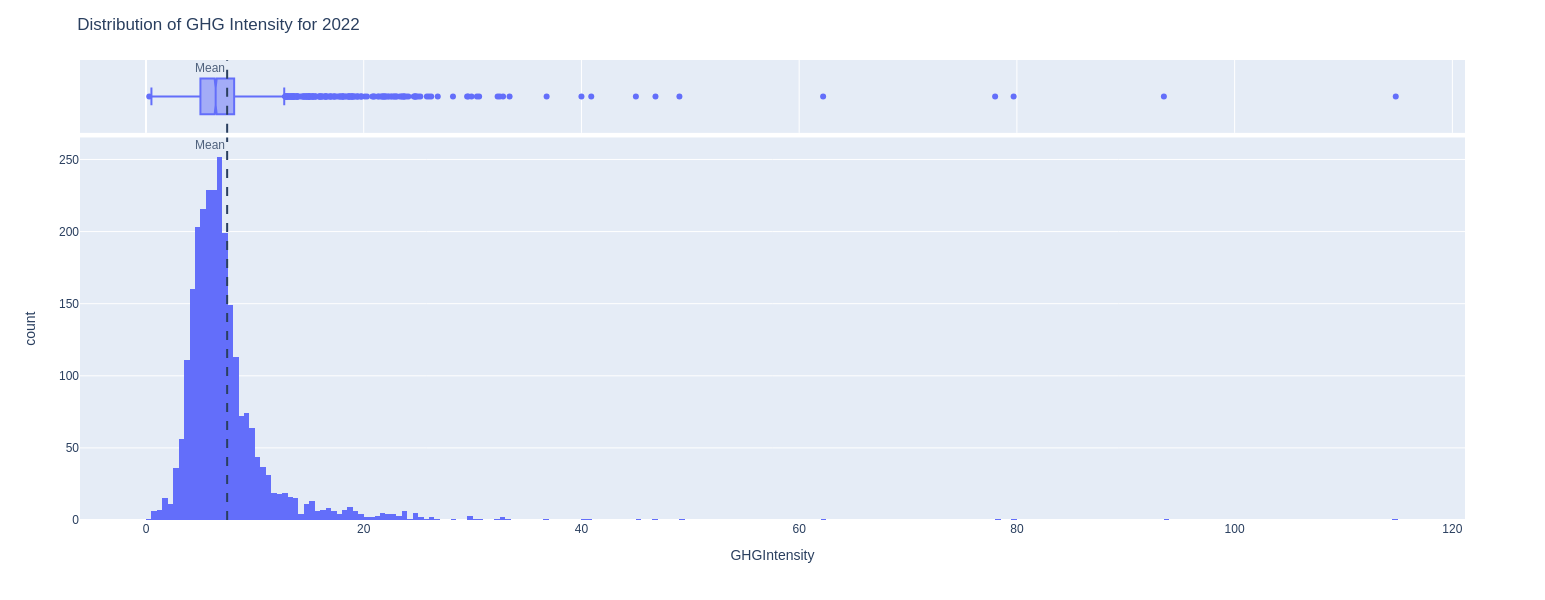

In [13]:
fig = px.histogram(
    df_current,
    x="GHGIntensity",
    marginal="box", # or violin, rug
    # hover_data=df.columns
)

# Calculate/graph mean
mean_value = df_current['GHGIntensity'].mean()
fig.add_vline(
    x=mean_value, 
    line_width=2, 
    line_dash="dash", 
    # line_color="red", 
    annotation_text="Mean", 
    annotation_position="top left",
    annotation=dict(
        text=f"Mean: {mean_value:.2f}",
        showarrow=False,
        x=mean_value,
        y=1,
        yref="paper",
        align="left",
        # bgcolor="red",
        opacity=0.8
    )
)

fig.update_layout(
    width=1200,
    height=600,
    title=f"Distribution of GHG Intensity for {latest_year}",
)

fig.show()

In [14]:
num_ghg_missing_latest_year = df_current['GHGIntensity'].isna().sum()
print(f"Number of records without GHGIntensity in {latest_year}: {num_ghg_missing_latest_year}")

Number of records without GHGIntensity in 2022: 0


## GHG Intensity Distribution by Property Type (Latest Year)

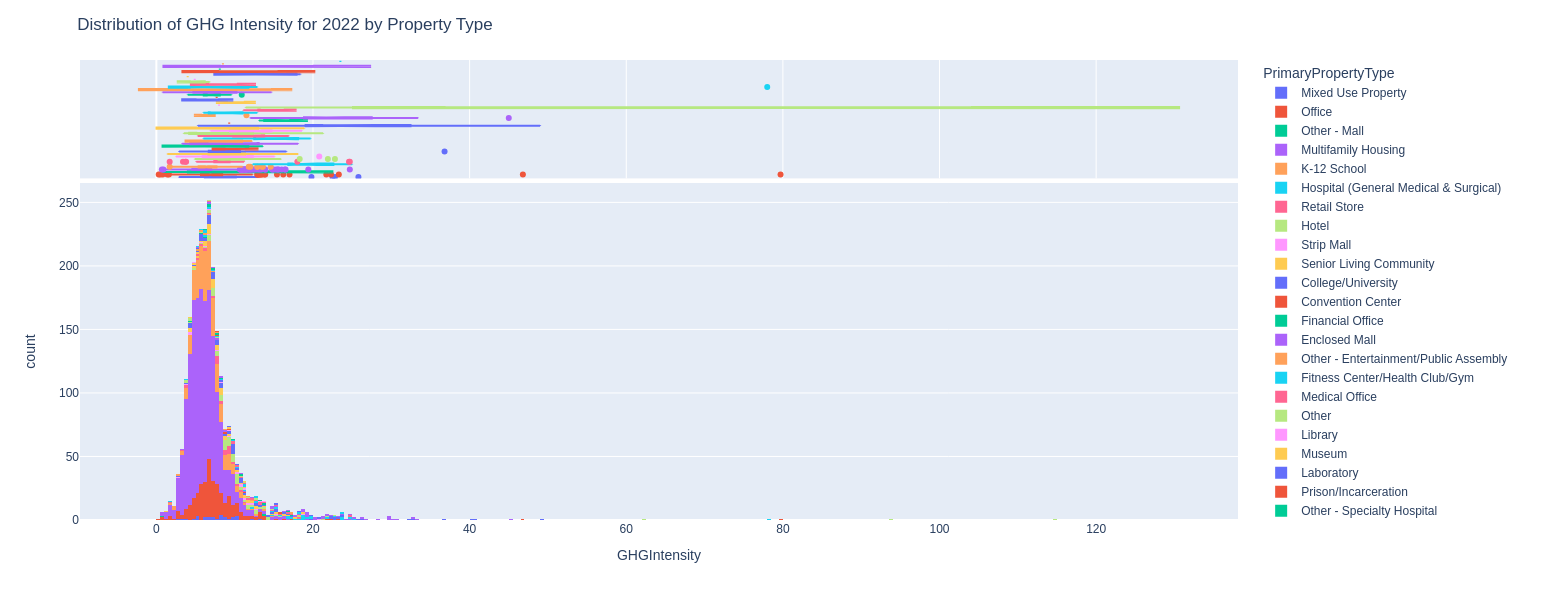

In [15]:
fig = px.histogram(
    df_current,
    x="GHGIntensity",
    marginal="box", # or violin, rug
    color="PrimaryPropertyType",
    # hover_data=df.columns
)


fig.update_layout(
    width=1200,
    height=600,
    title=f"Distribution of GHG Intensity for {latest_year} by Property Type",
)

fig.show()

## GHG Intensity vs Energy Star Rating (Latest Year)

In [16]:
missing_energy_star_num = df_current[["ENERGYSTARScore"]].isna().sum()
print(f"{missing_energy_star_num.iloc[0]} Energy Star Scores missing out of {df_current.shape[0]} for {latest_year}.")

310 Energy Star Scores missing out of 2549 for 2022.


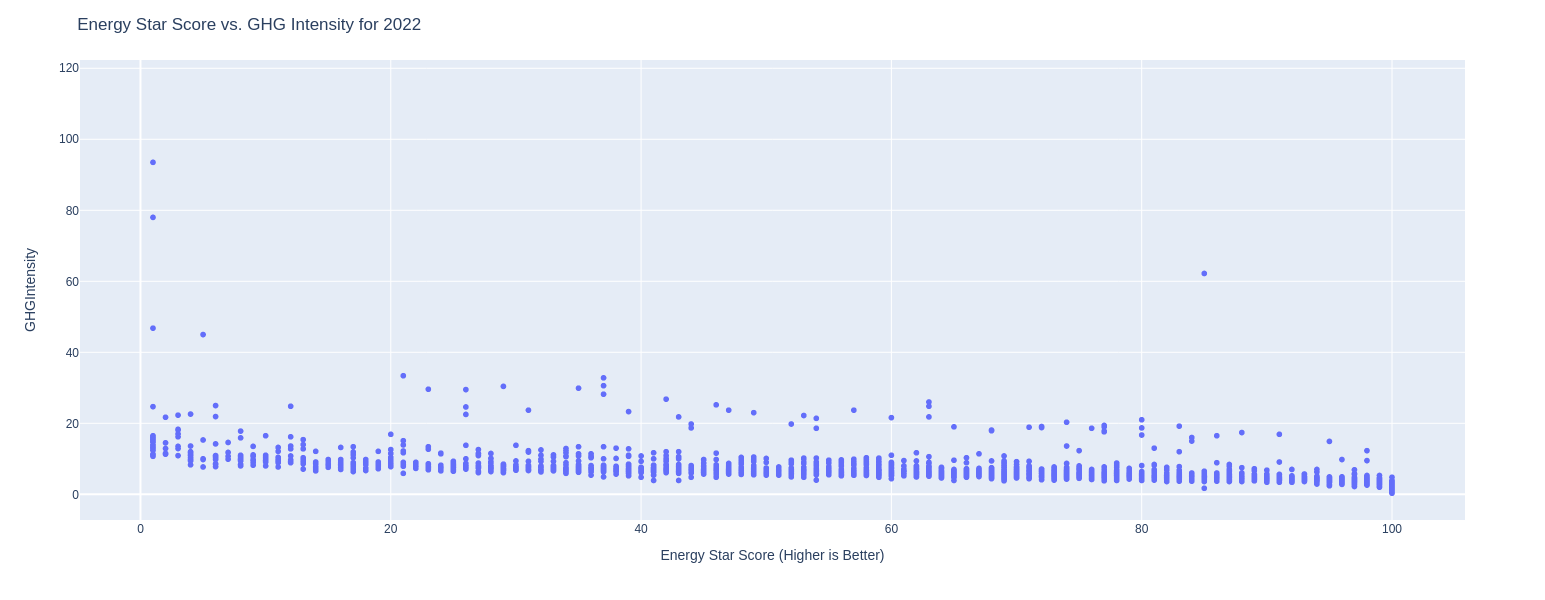

In [17]:
fig = px.scatter(
    df_current,
    y="GHGIntensity",
    x="ENERGYSTARScore",
)


fig.update_layout(
    width=1200,
    height=600,
    title=f"Energy Star Score vs. GHG Intensity for {latest_year}",
    xaxis_title='Energy Star Score (Higher is Better)'
)

fig.show()

In [18]:
correlation = df_current['ENERGYSTARScore'].corr(df_current['GHGIntensity'])

print(f"Correlation between ENERGYSTARScore and GHGIntensity: {correlation}")

Correlation between ENERGYSTARScore and GHGIntensity: -0.4845977490329846


Conclusion: Generally, higher Energy Star Score is (linearly) associated with lower GHG Intensity, as expected. But not all of GHG Intensity can be (linearly) explained by the Energy Star Score alone; about half is unaccounted for.

## Grading

### GHG Intensity

#### GHG Intensity Grade: Year-Based Percentile

Assign Grades:

In [128]:
from grading_funcs import generate_energy_int_grade

In [135]:
ghg_intensity_grades_df = generate_energy_int_grade(df=df, year=latest_year)
ghg_intensity_grades_df

GHGIntensityPercentileGrade GHGIntensityLetterGrade
0                          6.8262                       F
2                         56.3750                       C
3                          5.7670                       F
6                         24.4802                       D
7                         82.8953                       A
...                           ...                     ...
3383                      87.0537                       A
3385                      58.7681                       C
3386                      11.0632                       F
3387                      33.4641                       D
3391                      26.9517                       D

[2549 rows x 2 columns]

In [136]:
field = "GHGIntensity"
ghg_related_df: pd.DataFrame = df.loc[
        df["DataYear"] == latest_year,
        ["ID", "DataYear", field]
    ]
    
ghg_intensity: pd.Series = ghg_related_df.loc[:, field]

ghg_intensity_grades_df = pd.concat(
    [
        ghg_related_df,
        ghg_intensity_grades_df
    ],
    axis=1
)
ghg_intensity_grades_df

ID  DataYear  GHGIntensity  GHGIntensityPercentileGrade  \
0     100001      2022       13.0000                       6.8262   
2     100019      2022        6.0000                      56.3750   
3     100068      2022       13.9000                       5.7670   
6     100211      2022        8.1000                      24.4802   
7     100252      2022        4.5000                      82.8953   
...      ...       ...           ...                          ...   
3383  260118      2022        4.2000                      87.0537   
3385  260127      2022        5.9000                      58.7681   
3386  260129      2022       10.7000                      11.0632   
3387  260132      2022        7.3000                      33.4641   
3391  260184      2022        7.8000                      26.9517   

     GHGIntensityLetterGrade  
0                          F  
2                          C  
3                          F  
6                          D  
7                          A  
...                      ...  
3383                       A  
3385                       C  
3386                       F  
3387                       D  
3391                       D  

[2549 rows x 5 columns]

#### GHG Intensity Percentile Grade Distribution

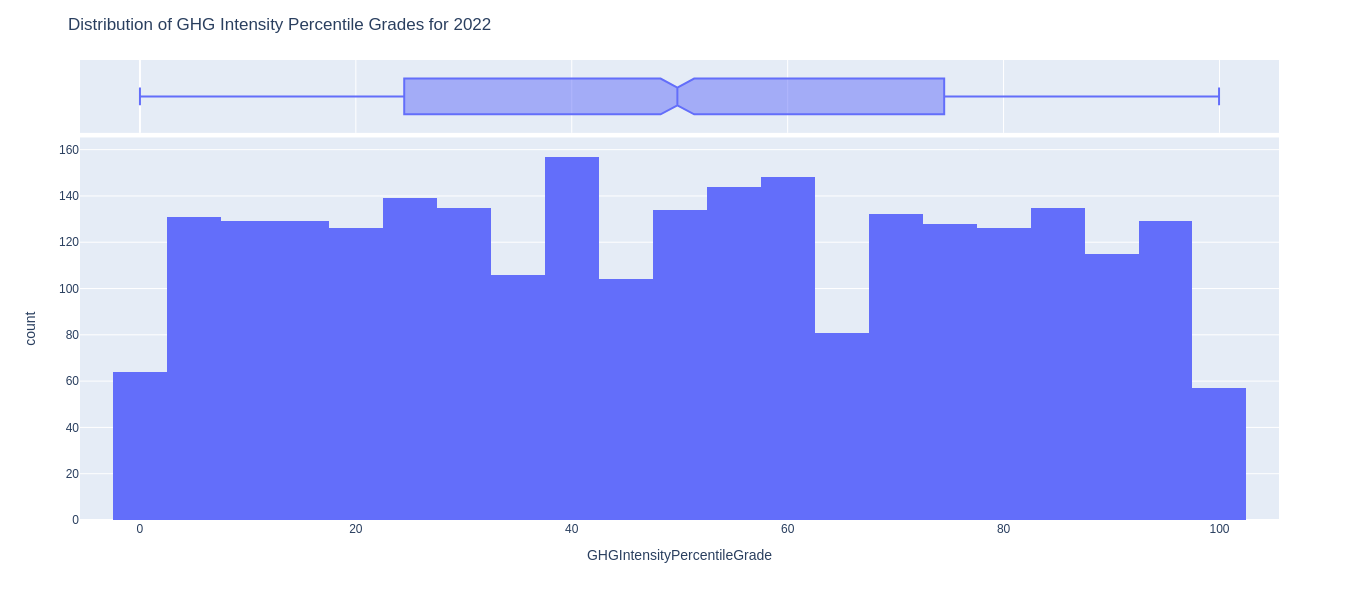

In [137]:
fig = px.histogram(
    ghg_intensity_grades_df,
    x="GHGIntensityPercentileGrade",
    marginal="box", # or violin, rug
)

fig.update_layout(
    width=1200,
    height=600,
    title=f"Distribution of GHG Intensity Percentile Grades for {latest_year}",
)

fig.show()

#### GHG Intensity Percentile Grade vs GHG Intensity

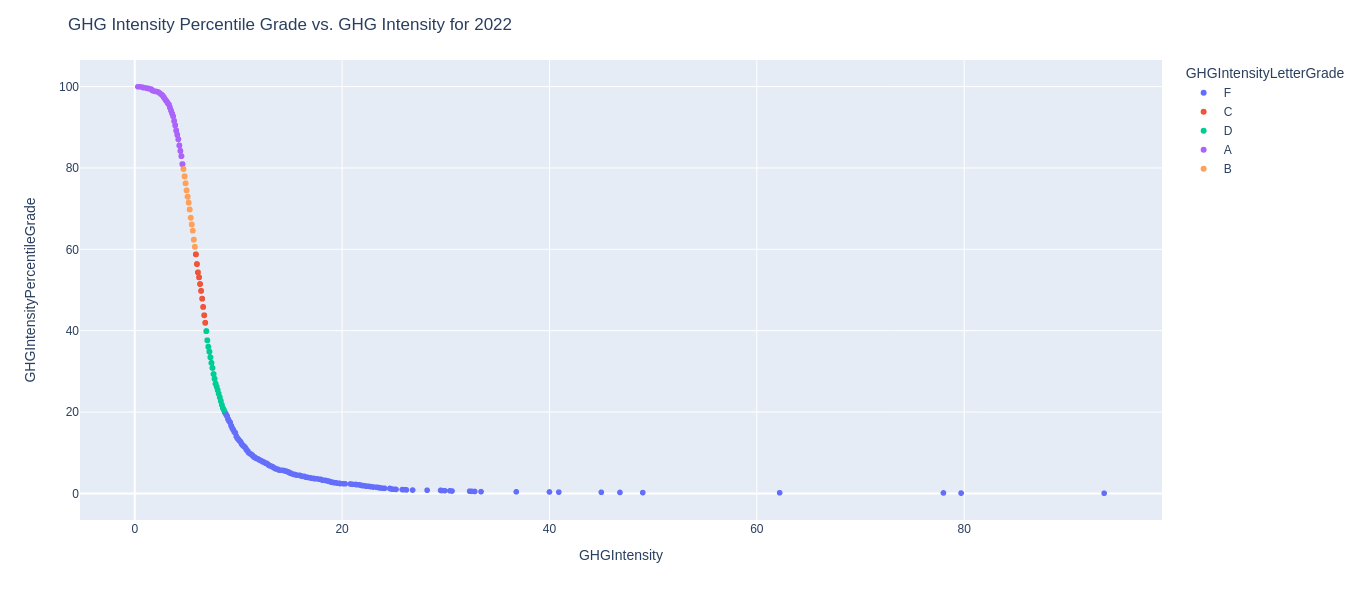

In [138]:
fig = px.scatter(
    ghg_intensity_grades_df,
    x="GHGIntensity",
    y="GHGIntensityPercentileGrade",
    color="GHGIntensityLetterGrade",
)

fig.update_layout(
    width=1200,
    height=600,
    title=f"GHG Intensity Percentile Grade vs. GHG Intensity for {latest_year}",
)

fig.show()

Limitations of this grading method:
- Is not a peer-to-peer comparison; e.g. a 24/7 hospital would be graded with the same methodology as an office building.
- Even if all buildings as a whole emit less and less GHG year-over-year, there will always be the same proportion of them in each letter grade category within each given year. I.e. there will always be 1/5 of building receiving each particular grade within each year => should there be instead a reference (index/benchmark) year? Or a different grading methodology that accounts for improvement over time?
- An alternative: do similar to Energy Star Scores: calculate a building's expected GHG Intensity via OLS linear regression based on its peers, then do ratio between actual GHG Intensity and its predicted value, then do percentile score. OLS can be run using [Building Performance Database (BPD) Application Programming Interface (API)](https://buildings.lbl.gov/cbs/bpd-api-documentation/).

#### Energy Mix

These data are from [`Energy Star's Historical Greenhouse Gas Factors, 2000 – present`](file:///home/tyansg/Zotero/storage/7UM5TEDU/historical-greenhouse-gas-factors-2000-present.html)

In [31]:
basic_rows_to_skip = [0, 1, 2]

direct_ghg_emissions_factors_df = pd.read_excel(
    "Historical_GHG_Factors.xlsx",
    sheet_name="US Emission Factors",
    usecols="A:AA",
    skiprows=basic_rows_to_skip + [4],
    nrows=11,
)

ghg_emissions_factors_df

Fuel Type  Subregion       2000       2001       2002  \
0                Natural Gas        NaN   53.07200   53.07200   53.07200   
1                    Propane        NaN   61.49562   61.49562   61.49562   
2           Fuel Oil (No. 1)        NaN   73.49900   73.49900   73.49900   
3           Fuel Oil (No. 2)        NaN   74.20900   74.20900   74.20900   
4           Fuel Oil (No. 4)        NaN   75.28900   75.28900   75.28900   
5   Fuel Oil (No. 5 & No. 6)        NaN   75.34900   75.34900   75.34900   
6                     Diesel        NaN   74.20900   74.20900   74.20900   
7          Coal (anthracite)        NaN  104.26700  104.26700  104.26700   
8          Coal (bituminous)        NaN   94.12700   94.12700   94.12700   
9                       Coke        NaN  102.76700  102.76700  102.76700   
10                  Kerosene        NaN   77.69000   77.69000   77.69000   

         2003       2004       2005       2006       2007  ...      2015  \
0    53.07200   53.07200   53.07200   53.07200   53.07200  ...   53.1148   
1    61.49562   61.49562   61.49562   61.49562   61.49562  ...   64.2480   
2    73.49900   73.49900   73.49900   73.49900   73.49900  ...   73.4990   
3    74.20900   74.20900   74.20900   74.20900   74.20900  ...   74.2090   
4    75.28900   75.28900   75.28900   75.28900   75.28900  ...   75.2890   
5    75.34900   75.34900   75.34900   75.34900   75.34900  ...   75.3490   
6    74.20900   74.20900   74.20900   74.20900   74.20900  ...   74.2090   
7   104.26700  104.26700  104.26700  104.26700  104.26700  ...  104.4418   
8    94.12700   94.12700   94.12700   94.12700   94.12700  ...   94.0318   
9   102.76700  102.76700  102.76700  102.76700  102.76700  ...  114.4218   
10   77.69000   77.69000   77.69000   77.69000   77.69000  ...   77.6900   

        2016      2017      2018      2019      2020      2021      2022  \
0    53.1148   53.1148   53.1148   53.1148   53.1148   53.1148   53.1145   
1    64.2480   64.2480   64.2480   64.2480   64.2480   64.2480   61.9530   
2    73.4990   73.4990   73.4990   73.4990   73.4990   73.4990   73.4930   
3    74.2090   74.2090   74.2090   74.2090   74.2090   74.2090   74.2030   
4    75.2890   75.2890   75.2890   75.2890   75.2890   75.2890   75.2830   
5    75.3490   75.3490   75.3490   75.3490   75.3490   75.3490   74.2580   
6    74.2090   74.2090   74.2090   74.2090   74.2090   74.2090   75.1630   
7   104.4418  104.4418  104.4418  104.4418  104.4418  104.4418  104.4220   
8    94.0318   94.0318   94.0318   94.0318   94.0318   94.0318   94.0120   
9   114.4218  114.4218  114.4218  114.4218  114.4218  114.4218  114.4020   
10   77.6900   77.6900   77.6900   77.6900   77.6900   77.6900   75.4430   

        2023      2024  
0    53.1145   53.1145  
1    61.9530   61.9530  
2    73.4930   73.4930  
3    74.2030   74.2030  
4    75.2830   75.2830  
5    74.2580   74.2580  
6    75.1630   75.1630  
7   104.4220  104.4220  
8    94.0120   94.0120  
9   114.4020  114.4020  
10   75.4430   75.4430  

[11 rows x 27 columns]

In [41]:
indirect_ghg_emissions_district_fuels_df = pd.read_excel(
    "Historical_GHG_Factors.xlsx",
    sheet_name="US Emission Factors",
    usecols="A:AA",
    skiprows=basic_rows_to_skip + list(range(basic_rows_to_skip[-1] + 2, 17)),
    nrows=5,
)

indirect_ghg_emissions_district_fuels_df

Fuel Type  Subregion       2000  \
0                                     District Steam        NaN  88.538479   
1                                 District Hot Water        NaN  88.538479   
2   District Chilled Water - Electric Driven Chiller        NaN  52.704750   
3  District Chilled Water - Absorption Chiller us...        NaN  73.863583   
4  District Chilled Water - Engine-Driven Chiller...        NaN  49.290500   

        2001       2002       2003       2004       2005       2006  \
0  88.538479  88.538479  88.538479  88.538479  88.538479  88.538479   
1  88.538479  88.538479  88.538479  88.538479  88.538479  88.538479   
2  52.704750  52.704750  52.704750  52.704750  52.704750  52.704750   
3  73.863583  73.863583  73.863583  73.863583  73.863583  73.863583   
4  49.290500  49.290500  49.290500  49.290500  49.290500  49.290500   

        2007  ...       2015       2016       2017       2018       2019  \
0  88.538479  ...  66.398500  66.398500  66.398500  66.398500  66.398500   
1  88.538479  ...  66.398500  66.398500  66.398500  66.398500  66.398500   
2  52.704750  ...  52.700417  52.700417  52.700417  52.700417  52.700417   
3  73.863583  ...  73.889250  73.889250  73.889250  73.889250  73.889250   
4  49.290500  ...  49.308167  49.308167  49.308167  49.308167  49.308167   

        2020       2021       2022       2023       2024  
0  66.398500  66.398500  66.398500  66.398500  66.398500  
1  66.398500  66.398500  66.398500  66.398500  66.398500  
2  52.700417  52.700417  52.700417  52.700417  52.700417  
3  73.889250  73.889250  73.889250  73.889250  73.889250  
4  49.308167  49.308167  49.308167  49.308167  49.308167  

[5 rows x 27 columns]

In [48]:
biomass_ghg_emissions_district_fuels_df = pd.read_excel(
    "Historical_GHG_Factors.xlsx",
    sheet_name="US Emission Factors",
    usecols="A:AA",
    skiprows=basic_rows_to_skip + list(range(basic_rows_to_skip[-1] + 2, 23)),
    nrows=1,
)

biomass_ghg_emissions_district_fuels_df

Fuel Type  Subregion    2000    2001    2002    2003    2004    2005  \
0      Wood        NaN  95.774  95.774  95.774  95.774  95.774  95.774   

     2006    2007  ...     2015      2016      2017     2018     2019  \
0  95.774  95.774  ...  95.0528  94.22266  94.22266  95.0528  95.0528   

      2020     2021     2022     2023     2024  
0  95.0528  95.0528  94.9556  94.9556  94.9556  

[1 rows x 27 columns]

In [51]:
# Chicago is in RFCW subregion, based on https://portfoliomanager.energystar.gov/pdf/reference/Emissions.pdf
indirect_ghg_emissions_electricity_df = pd.read_excel(
    "Historical_GHG_Factors.xlsx",
    sheet_name="US Emission Factors",
    usecols="A:AA",
    skiprows=basic_rows_to_skip + list(range(basic_rows_to_skip[-1] + 2, 25)),
    nrows=28,
).loc[indirect_ghg_emissions_electricity_df["Subregion"] == "RFCW"]

indirect_ghg_emissions_electricity_df

Fuel Type Subregion        2000        2001        2002  \
18  Electricity - Grid      RFCW  205.509492  205.509492  205.509492   

          2003        2004        2005        2006        2007  ...  \
18  205.509492  205.509492  205.509492  205.509492  207.370221  ...   

          2015        2016        2017        2018       2019        2020  \
18  184.894761  166.364182  166.364182  156.069312  142.82648  131.714194   

          2021        2022        2023        2024  
18  139.919595  133.705823  133.705823  133.705823  

[1 rows x 27 columns]

In [63]:
df_current.columns

Index(['DataYear', 'ID', 'PropertyName', 'ReportingStatus', 'Address',
       'ZIPCode', 'ChicagoEnergyRating', 'ExemptFromChicagoEnergyRating',
       'CommunityArea', 'PrimaryPropertyType', 'GrossFloorArea', 'YearBuilt',
       'NumberOfBuildings', 'WaterUse', 'ENERGYSTARScore', 'ElectricityUse',
       'NaturalGasUse', 'DistrictSteamUse', 'DistrictChilledWaterUse',
       'AllOtherFuelUse', 'SiteEUI', 'SourceEUI', 'WeatherNormalizedSiteEUI',
       'WeatherNormalizedSourceEUI', 'TotalGHGEmissions', 'GHGIntensity',
       'Latitude', 'Longitude', 'Location', 'Row_ID', 'Wards',
       'CommunityAreas', 'ZipCodes', 'CensusTracts',
       'HistoricalWards2003-2015', 'GHGIntensityRank',
       'GHGIntensityPercentileRank', 'TotalGHGEmissionsRank',
       'TotalGHGEmissionsPercentileRank', 'ElectricityUseRank',
       'ElectricityUsePercentileRank', 'NaturalGasUseRank',
       'NaturalGasUsePercentileRank', 'GrossFloorAreaRank',
       'GrossFloorAreaPercentileRank', 'SourceEUIRank',
    

In [66]:
# In kBtu:
energy_source_cols = ["ElectricityUse", "NaturalGasUse", "DistrictSteamUse", "DistrictChilledWaterUse", "AllOtherFuelUse"]
energy_use_df = df_current.loc[:, energy_source_cols]
energy_use_df

ElectricityUse  NaturalGasUse  DistrictSteamUse  \
0         16795066.2     33899078.5               0.0   
2          1641381.8      2465232.2               0.0   
3          8354489.4       331613.0               0.0   
6         12253233.4     14931549.6               0.0   
7          1550327.6       110041.9               0.0   
...              ...            ...               ...   
3383        669935.5      3679236.0               0.0   
3385       7924051.9      3717569.9               0.0   
3386       2750911.1      3444364.9               0.0   
3387       4204386.8      2280683.7               0.0   
3391       3070202.6     12991299.7               0.0   

      DistrictChilledWaterUse  AllOtherFuelUse  
0                         0.0              NaN  
2                         0.0              NaN  
3                         0.0              NaN  
6                         0.0              NaN  
7                         0.0              NaN  
...                       ...              ...  
3383                      0.0              NaN  
3385                      0.0              NaN  
3386                      0.0              NaN  
3387                      0.0              NaN  
3391                      0.0              NaN  

[2549 rows x 5 columns]

In [69]:
energy_use_df.shape

(2549, 5)

In [70]:
energy_use_df.isna().sum()

ElectricityUse                0
NaturalGasUse                 0
DistrictSteamUse              0
DistrictChilledWaterUse       0
AllOtherFuelUse            2549
dtype: int64

There is no reporting in the `AllOtherFuelUse` category.

In [134]:
energy_use_df.sum()

ElectricityUse            24403281708.8000
NaturalGasUse             28232958993.2000
DistrictSteamUse           1580849222.1000
DistrictChilledWaterUse     980802279.5000
AllOtherFuelUse                     0.0000
dtype: float64

#### Energy Mix Grade: Simple Arbitrary Weight Score

In [155]:
from grading_funcs import generate_energymix_grade

In [156]:
generate_energymix_grade(df, year=2022)

EnergyMixPercentileGrade EnergyMixLetterGrade
0                      45.1942                    C
2                      56.3750                    C
3                      93.2130                    A
6                      63.7897                    B
7                      92.8207                    A
...                        ...                  ...
3383                    9.0231                    F
3385                   85.5237                    A
3386                   63.0051                    B
3387                   84.1899                    A
3391                   16.0063                    F

[2549 rows x 2 columns]

#### Reporting Years (not reporting is bad)

In [57]:
df.loc[:, "ReportingStatus"].unique()

array(['Submitted Data', 'Submitted'], dtype=object)

In [58]:
df.loc[:, "ReportingStatus"].isna().sum()

0

In [60]:
df.loc[:, "DataYear"].unique()

array([2022, 2020, 2018, 2021, 2017, 2019, 2015, 2014, 2016])

Conclusion: 
There don't seem to be any "unreported" years, assuming "Submitted Data" counts as "reporting" (?)